<a href="https://colab.research.google.com/github/kslote1/Data-Driven-Dynamics/blob/main/chapter_one/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis using Singular Value Decomposition

Principal Component Analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. Here, we applied PCA to the Iris dataset using Singular Value Decomposition (SVD).

### Singular Value Decomposition (SVD)

SVD is a matrix factorization technique that decomposes a matrix into three other matrices. If we have a matrix $A$ (in our case, the standardized Iris dataset), SVD decomposes $A$ into:

$$ A = U \Sigma V^T $$

- $U$ is an $m \times m$ unitary matrix.
- $\Sigma$ (often represented as $S$ is an $m \times n$ diagonal matrix with non-negative real numbers on the diagonal.
- $V^T$ is the transpose of an $n \times n$ unitary matrix $V$.

The diagonal entries $\sigma_i$ of $\Sigma$ are known as the singular values of $A$.

### Steps in PCA using SVD

1. **Standardization**: The first step in PCA is to standardize the data so that each feature contributes equally to the analysis. This is done by subtracting the mean and dividing by the standard deviation for each feature.

2. **Applying SVD**: After standardizing the data, we applied SVD. In the context of PCA, the columns of $U$ (left-singular vectors) are not used, and the focus is on $\Sigma$ and $V^T$.

3. **Principal Components**: The principal components are given by the rows of $V^T$. The first few rows correspond to the directions in which the data varies the most.

4. **Projection**: We project the standardized data onto the principal component axes to reduce the dimensions of the data. This is done by multiplying the standardized data matrix by the first few columns of $V$ (or rows of $V^T$.

5. **Plotting the Results**: Finally, the data projected onto the first two principal components is plotted. This helps to visualize the data in a reduced-dimensional space where the separation between different classes can be better appreciated.

In our analysis, we reduced the Iris dataset (which originally has four features) to two dimensions using PCA, revealing clear distinctions among the species.


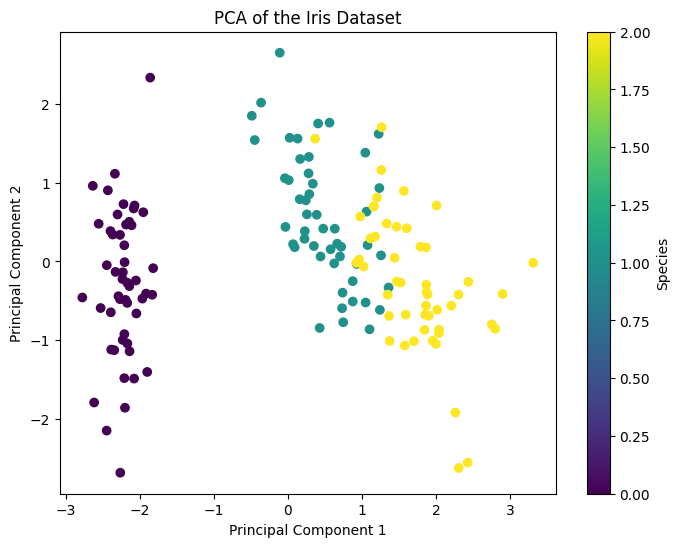

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardize the data (mean=0, variance=1)
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Perform SVD
U, S, Vt = np.linalg.svd(X_std)

# Project the data onto the first two principal components
Z = np.dot(X_std, Vt.T)

# Plotting the projection
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Iris Dataset')
plt.colorbar(label='Species')
plt.show()

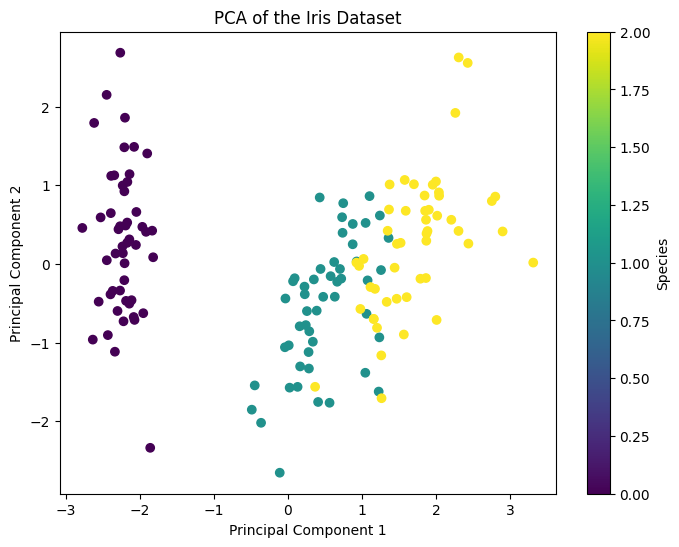

In [3]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
Z = pca.fit_transform(X_std)

# Plotting the projection
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Iris Dataset')
plt.colorbar(label='Species')
plt.show()